# Einführung
Willkommen bei "Komm' wir spielen NSA!"!

Dieses Notebook ist eine kleine Einführung in die Data Science Welt mit Python, dem Notebook-System Jupyter, dem Datenanalyse-Framework Pandas, der Visualisierungsbibliothek "matplotlib" und der Machine-Learning-Bibliothek "scikit-learn".

Die Aufgabe ist, aus dem Mitschnitt von Telefon-Metadaten herauszufinden, wo die von uns verdächtigte Person namens "John Doe" wohnt. Ganz nebenbei lernen wir die wichtigsten Dinge im Umgang mit Python & Co. .

Das Notebook erklärt hierzu immer die Funktionsweisen und die Aufgaben der notwendigen Analyseschritte.

## Importieren von Bibliotheken
Als erstes wollen wir über den in Python üblichen Weg das Modul "Pandas" einbinden.

Generell können sog. Module auf mehrere Arten eingebunden werden:

* Einfaches Einbinden mittels `import <modul>`, z. B. `import pandas`
* Einbinden mit separatem Namen mittels `import <modul> as <name>`, z. B. `import pandas as pd`
* Einbinden eines Untermoduls mittels `from <hauptmodul> import <modul>`, z. B. `from matplotlib import pyplot`

Wir möchten gerne das Modul "Pandas" als `pd` einbinden. Die Zelle können wir dann mit dem Tastenkürzel `Shift` + `Enter` ausführen.

In [1]:
import pandas as pd

### Interaktive Hilfe
Ob das Importieren des Moduls auch wirklich funktioniert hat, können wir prüfen, in dem wir mit dem `pd`-Modul arbeiten. Dazu hängen wir an die `pd`-Variable den `?` Operator an und führen die Zelle aus. Es erscheint die Dokumentation des Moduls im unteren Bereich des Notebooks. Diesen Bereich können wir durchlesen und mit der Taste `ESC` auch wieder verschwinden lassen.

In [2]:
pd?

Die weitere Funktionalität der Pandas-Bibliothek können wir erkunden, indem wir die Methoden von Pandas ansehen. Dazu verwenden wir `pd.` und nutzen die integrierte Autovervollständigung von Jupyter mittels der Tabulatortaste `Tab`, um zu sehen, welche Methoden uns Pandas bietet. Gehen wir dann mit der Pfeiltaste `unten` z. B. auf `Categorical`, drücken `Enter` und schließend `Shift`+ `Tab`, dann erscheint die Signatur des entsprechenden Funktionalität und der Ausschnitt der Hilfedokumentation. Bei zweimaligem Drücken von `Shift` + `Tab` erscheint die Hilfe vollständig.

In [3]:
pd.Categorical

pandas.core.categorical.Categorical

### Laden von Daten
Als nächstes Laden wir Telefon-Metadaten (sog. CDRs: Call Data Records) aus einer Datei mit kommaseparierten Daten (einer "CSV"-Datei: "Comma-separated values"). 

Pandas bietet hierzu eine Methode namens `read_csv`. Diese nimmt als ersten Parameter einen Pfad entgegen. Diverse andere Argumente können angegeben werden, um spezielle Varianten von CSV-Dateien einlesen zu können. Z. B.
* `sep`: Trennzeichen für Daten in einer Zeile wie etwa `sep=";"`
* `encoding`: andere Zeichenkodierungen wie etwa `encoding="latin-1"`
* `dtype`: Zuordnung von Spalten zu speziellen Datentypen wie etwa `dtype={ 0:str }`

Lesen wir erst einmal die Datei `data/CDR_data.csv` ohne jegliche Argumente ein. Diese Datei enthält die für 10 Mobilfunknutzer gesammelten Telefon-Metadaten über drei Jahre hinweg. Folgende Informationen sind darin enthalten:

* `In`: Die anrufende Telefonnummer 
* `Out`: Die ausgehende Telefonnummer
* `Direction`: Die Richtung des Telefonats
* `CallTimestamp`: Der Zeitstempel des Anrufs
* `Duration`: Die Dauer des Telefonats
* `TowerID`: Die ID des ersten Mobilfunkmasten, der beim Anruf genutzt wurde

Wir lesen die Daten ein und weisen das Ergebnis mittels `=` der neuen Variable `cdr` zu. Mittels der Methode `head()` können wir uns dann in der Folgezeile die ersten fünf Einträge anzeigen lassen.

In [4]:
cdr = pd.read_csv('data/CDR_data.csv')
cdr.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID
0,4638472273,2666307251,Incoming,2010-12-25 07:16:24.736813,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec
1,4638472273,1755442610,Incoming,2010-12-25 21:18:30.053710,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf
2,4638472273,5481755331,Incoming,2010-12-25 14:52:42.878016,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00
3,4638472273,1755442610,Incoming,2010-12-25 16:02:09.001913,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00
4,4638472273,2145623768,Incoming,2010-12-25 15:28:35.028554,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807


Als nächstes sehen wir uns mit der `info()`-Methode an, was uns nun Pandas in die `cdr`-Variable geschrieben hat.

In [5]:
cdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Data columns (total 6 columns):
In               53188 non-null int64
Out              53188 non-null int64
Direction        53188 non-null object
CallTimestamp    53188 non-null object
Duration         53188 non-null object
TowerID          53188 non-null object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


### DataFrame
Wir sehen, das wir nun einen `DataFrame` erhalten haben. Einen `DataFrame` können wir uns ersteinmal wie ein Excel-Arbeitsblatt vorstellen. Er besteht aus Zeilen ("rows") und Spalten ("columns"). Wir können auf Zeilen und Spalten Operationen beliebiger Art ausführen lassen. Vor allem die spaltenweise Verarbeitung ist hier sehr effizient gelöst.

Speziell unser `DataFrame` enthält nun 53188 Einträge von Telefonaten. Wir können das prüfen, indem wir über die in Python eingebauten `len`-Methode auf den unseren `cdr`-`DataFrame` anwenden.

In [6]:
len(cdr)

53188

Zudem sehen wir Informationen über die Datentypen in dem `Dataframe`. Die beiden ersten Spalten `In` und `Out` sind vom Typ `int64`, also Ganzzahlen, welche als 64-Bit gespeichert werden (können also sehr große Zahlen werden). Die vier anderen Spalten sind vom Typ `object`, was in unserem Fall soviel bedeutet, dass wir hier ersteinmal reine Zeichenketten bzw. Texte vorliegen haben.

Alle Spalten werden als `non-null` angezeigt. D. h. dass in jeder Reihe für jede Spalte immer ein Eintrag vorhanden ist.

Für einzelne Spalten eines `DataFrame`s (den sog. `Series`) können ganz schnelle Auswertungen vornehmen. Z. B. können wir einmal nachsehen, wie lange die durchschnittliche Dauer aller Telefonate ist. Vorher müssen wir jedoch die Spalte noch in einen passenden Datentyp umwandeln. Pandas bietet uns hier verschiedene Helfermethoden, um dies zu bewerkstelligen:

* `to_numeric` wandelt Daten in Zahlen um
* `to_datetime` wandelt Daten in Datumsangaben um
* `to_timedelta` wandelt Daten in Zeitangaben um

Hierzu nutzen wir die Spalte `Duration` und wenden darauf die Methode `mean()` an. Den Zugriff auf die Spalte können wir mittels zwei unterschiedlicher Schreibweisen vornehmen:
* Map-Schreibweise: Hier verwenden wir eckige Klammern zum Zugriff auf eine Spalte: `cdr['Duration']`. Ein wesentlicher Vorteil dieser Schreibweise ist, dass hier jeder Spaltenname (z. B. mit Leerzeichen oder Zahlen) angesprochen werden kann
* Attribut-Schreibweise: Hier können wir Spalte direkt auf dem `DataFrame` aufrufen: `cdr.Duration`. Ein Vorteil dieser Schreibweise ist, dass hier die Autovervollständigung funktioniert. Ich bevorzuge diese Schreibweise, soweit das möglich ist.

Wir wandeln die Spalte `CallTimestamp` mittels `pd.to_datetime` und die Spalte `Duration` mittels `pd.to_timedelta` entsprechend ihrer passenden Datentypen um. Die Ergebnisse speichern wir gleich wieder in die entsprechenden Spalten. Mit `info()` auf den `DataFrame` können wir nun kontrollieren, ob die Umwandlung erfolgreich war.

In [7]:
cdr.CallTimestamp = pd.to_datetime(cdr.CallTimestamp)
cdr.Duration = pd.to_timedelta(cdr.Duration)
cdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Data columns (total 6 columns):
In               53188 non-null int64
Out              53188 non-null int64
Direction        53188 non-null object
CallTimestamp    53188 non-null datetime64[ns]
Duration         53188 non-null timedelta64[ns]
TowerID          53188 non-null object
dtypes: datetime64[ns](1), int64(2), object(2), timedelta64[ns](1)
memory usage: 2.4+ MB


Nun können wir auf der Spalte `Duration` den Durchschnitt mit `mean()` berechnen.

In [8]:
cdr.Duration.mean()

Timedelta('0 days 00:06:17.955897')

Wir sehen, dass die durchschnittliche Anrufdauer bei etwa sechs Minuten liegt.

## Verschneiden mit anderen Daten
Im nächsten Schritt wollen die wir Namen hinter den Telefonnummern herausfinden. Dazu haben wir eine Excel-Datei, welche die entsprechenden Nummern zu den Namen zuordnet namens `phoneowners.xlsx` im Ordner `data`.

In [17]:
phone_owners = pd.read_excel("data/phoneowners.xlsx")
phone_owners.head()

,number,name
0,4638472273,Kyle Moses
1,1559410755,Tommy Williams
2,4931532174,Dawn Meadows
3,2419930464,Jennifer Mendoza
4,1884182865,Charles Kelley


Die Spalten dieser Datei wollen wir nun an den obigen `cdr`-`DataFrame` mit anhängen. Hierzu verwenden wir die Funktion `pd.merge`, welche es uns erlaubt, beliebige Spalten aus unterschiedlichen `DataFrame`s zusammenzuführen.

```python
pd.merge(
    left, 
    right,  
    left_on=None, 
    right_on=None,  
    ...)
```

Das Ergebnis ist ein neuer `DataFrame`, den wir in der Variable `cdr_names` speichern. Wir zeigen hier einmal nur die ersten fünf Einträge der relevanten Spalten in der Ausgabe an, in dem wir einen Sub-`DataFrame` mit den eckigen, doppelten Klammern erzeugen und darauf direkt die `head()`-Methode aufrufen.

In [15]:
cdr_names = pd.merge(cdr, phone_owners, left_on='In', right_on='number')
cdr_names[['In', 'number', 'name']].head()

,In,number,name
0,4638472273,4638472273,Cory Johnson
1,4638472273,4638472273,John Doe
2,4638472273,4638472273,Cory Johnson
3,4638472273,4638472273,John Doe
4,4638472273,4638472273,Cory Johnson


Da wir nun wissen, welche Telefonnummer John Doe gehört, können wir die entsprechenden Datensätze herausfinden und alle anderen Datensätze ignorieren. Dazu selektieren wir nun mit Hilfe der Selektor-Schreibweise die entsprechenden Datensätze.

Der Selektor wird mit einer offenen, eckigen Klammer `[` begonnen und endet mit einer geschlossenen, eckigen Klammer `]`. Innerhalb der eckigen Klammern wir eine `Series` mit boolschen Werten erwartet, also eine Spalte, die pro Eintrag entweder wahr (`True`) oder (`False`) enthält.

Wir schaffen uns solche eine Spalte, in dem wir jetzt nachsehen, ob ein Eintrag in der Spalte `name` unseres `DataFrame`s `cdr_names` den Namen "John Doe" enthält.

In [19]:
ist_john_doe = cdr_names.name == "John Doe"
ist_john_doe.head()

0    False
1     True
2    False
3     True
4    False
Name: name, dtype: bool

Die obige Hilfevariable können wir nun in den Selektor schreiben und erhalten damit einen `DataFrame`, welcher nur die Anrufe von John Doe enthält. Das Ergebnis schreiben wir in die Variable `john_doe`.

In [20]:
john_doe = cdr_names[ist_john_doe]
john_doe.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID,number,name
1,4638472273,2666307251,Incoming,2010-12-25 07:16:24.736813,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,4638472273,John Doe
3,4638472273,1755442610,Incoming,2010-12-25 21:18:30.053710,00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,4638472273,John Doe
5,4638472273,5481755331,Incoming,2010-12-25 14:52:42.878016,00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,4638472273,John Doe
7,4638472273,1755442610,Incoming,2010-12-25 16:02:09.001913,00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,4638472273,John Doe
9,4638472273,2145623768,Incoming,2010-12-25 15:28:35.028554,00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,4638472273,John Doe


Im nächsten Schritt interessiert uns, wo John Doe überall telefoniert. Wir wissen dank der `TowerId`, an welchem Mobilfunkmasten John Doe eingeloggt war, als das Telefonat stattgefunden hatte. In der Datei `data/towers.csb` haben wir zudem die Informationen, an welcher geografischen Koordinate sich ein Mobilfunkmast befindet. Diese Angaben sind pro `TowerId` als Breitengrad und Höhengrad abgelegt. Zuerst laden wir die entsprechende CSV-Datei mittels `read_csv()`. Wir geben zusätzlich mittels `index_col=0` mit an, dass wir die erste Spalte im `DataFrame` als Index verwenden wollen.

In [26]:
towers = pd.read_csv("data/towers.csv", index_col=0)
towers.head()

,TowerLat,TowerLon
TowerID,,
0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389


Zum Zusammenführen der Daten mit unseren bestehenden CDR-`DataFrame` können wir diesesmal die `join()`-Methode verwenden, da wir im `towers` `DataFrame` einen Index auf die `TowerID`-Spalte angelegt haben. Die `join()`-Methode kann nun auf dieser Basis die Daten zusammenführen. Dazu müssen wir noch angeben, welche Spalte im `john_doe`-`DataFrame` die Index-Spalte im anderen `DataFrame` repräsentiert. Das Ergebnis speichern wir in der Variable `john_doe_towers`.

In [34]:
john_doe_towers = john_doe.join(towers, on='TowerID')
john_doe_towers.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID,number,name,TowerLat,TowerLon
1,4638472273,2666307251,Incoming,2010-12-25 07:16:24.736813,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,4638472273,John Doe,32.731611,-96.709417
3,4638472273,1755442610,Incoming,2010-12-25 21:18:30.053710,00:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,4638472273,John Doe,32.731722,-96.709500
5,4638472273,5481755331,Incoming,2010-12-25 14:52:42.878016,00:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,4638472273,John Doe,32.899944,-96.910389
7,4638472273,1755442610,Incoming,2010-12-25 16:02:09.001913,00:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,4638472273,John Doe,32.899944,-96.910389
9,4638472273,2145623768,Incoming,2010-12-25 15:28:35.028554,00:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,4638472273,John Doe,32.899944,-96.910389


Nun können wir irgendwie nicht mehr erwarten zu sehen, wo die Telefonate durchgeführt wurden. Dazu plotten wir mit der Visualisierungsbibliothek "matplotlib" die entsprechenden Koordinaten der Mobilfunkmasten.

In [37]:
import matplotlib.pyplot as plt
import matplotlib

# sagt Jupyter, dass die Plotausgabe direkt im Notebook passieren soll
%matplotlib inline 
# macht die Plots schöner
matplotlib.style.use('ggplot')

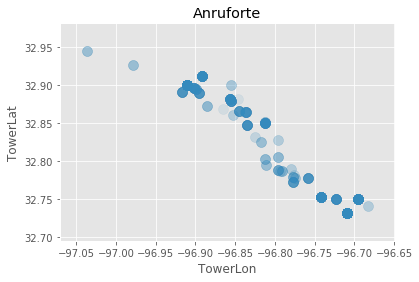

In [47]:
ax = john_doe_towers.plot.scatter(
    x='TowerLon',
    y='TowerLat',
    alpha=0.1,
    title='Anruforte',
    s = 100)

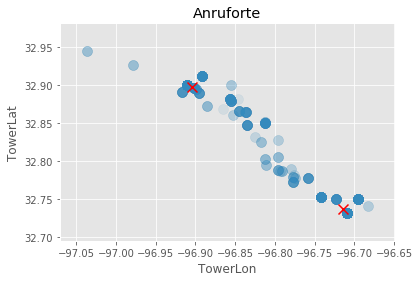

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
data = pd.concat([john_doe_towers.TowerLon, john_doe_towers.TowerLat], axis = 1)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)
ax.figure
#showandtell()  # TODO: Comment this line out when you're ready to proceed

In [49]:
centroids

array([[-96.90470092,  32.89725753],
       [-96.71403501,  32.73670309]])

In [ ]:
joined['CallTimestamp'] = pd.to_datetime(joined['CallTimestamp'])
weekdays = joined['CallTimestamp'].dt.dayofweek.isin(Workweek) & joined['CallTimestamp'].dt.hour.isin(range(8,18))
dfweekdays = joined[weekdays]
dfweekdays.head()

In [ ]:
targetname = 'John Doe'
user1 = joined[joined['Name'] == targetname]
#user1 = user1[weekdays]
user1 = user1.reset_index(drop=True)
user1.head()

In [ ]:
#
# INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play.
# Your intuition tells you that people are likely to behave differently on weekends:
#
# On Weekends:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday


#
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're only examining records that came in on
# weekends (sat/sun).
#
# .. your code here ..

user1['DOW'] = user1.CallTimestamp.dt.strftime("%a")

user1 = user1[(user1.DOW == 'Sat') | (user1.DOW == 'Sun')]
user1.head()
#
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00). You can use < and > to compare
# the string times, just make sure you code them as military time strings, eg: "06:00:00", "22:00:00":
# https://en.wikipedia.org/wiki/24-hour_clock
#
# You might also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:
#
# .. your code here ..

user1 = user1[(user1.CallTimestamp < "06:00:00") | (user1.CallTimestamp > "22:00:00")]
user1.head()

In [ ]:
#
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar with maps, you know well that your
# X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column
# feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell phone tower position data; but
# considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up
# is probably near the caller's residence:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
#showandtell()  # TODO: Comment this line out when you're ready to proceed

#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you notice multiple areas that are
# "hot" (multiple areas the usr spends a lot of time at that are FAR apart from one another), then increase K=2, with the goal being
# that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other data is suitable for your purposes.
# Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required. Print out the centroid locations and
# add them onto your scatter plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
# .. your code here ..

In [ ]:
#coordinates = "" + centroids[0][1].to_string().split('.')[0] + "°" + centroids[0][1].split('.')[1][0]  + centroids[0][1].split('.')[1][1] + centroids[0][0]
#str.split(' ', 1 )
centroids

difference1 = centroids[0][1] - centroids[1][1]
difference2 = centroids[0][0] - centroids[1][0]

difference1 = 0.5 * difference1
difference2 = 0.5 * difference2

coordinate1 = centroids[0][1] + difference1
coordinate2 = centroids[0][0] + difference2

coordinates = str(coordinate1) + " " + str(coordinate2)
coordinates

#-96°90'92.4672"N  96°56'57.3"W